# 0.0 Final Run Template

## Summary
Explores a subset of the FARS dataset using the double pair comparison method. Notebook prepared for IRCOBI Europe 2020.

## Changes
- 1/20/2020 v1.0 Mitchell Abrams
- 3/26/2020 v2.0 Mitchell Abrams: update to new loaders, simplify report
- 3/29/2020 v3.0 Mitchell Abrams: modify for Papermill parameterized runs, update figures and output paths

### Parameters for running with Papermill
All values in the following cell (tagged `parameters`) are adjustable using Papermill to run specific analyses.

In [1]:
# These are the parameters for runs with Papermill

image_outputs = 'default'

merged = None

driver_only = False

start_year = 1975
end_year = 2018

final_runs = False,

vehicle_types = ['PASSENGER_CAR', 'LIGHT_TRUCK_OR_VAN', 'MOTORCYCLE']

base_filter = f"'PASSENGER_CAR' and (SEX_C != 'Unknown') and (SEX_S != 'Unknown') and "\
                "(AGE_C < 99) and (AGE_S < 99)"

subsets = [
    {'data': "SEAT_POS_C == 'Front Seat – Right Side' and "
                     "RESTRAINTS_C == 'Not Used' and RESTRAINTS_S == 'Not Used'",
     'subject': {'sex': 'SEX_S', 'age': 'AGE_S',
                 'dead': 'DEAD_S', 'id': 'PER_ID_S',
                 'bin': [15] + [x for x in range(22, 101, 5)]
                },
     'control': {'sex': 'SEX_C', 'age': 'AGE_C',
                 'dead': 'DEAD_C', 'id': 'PER_ID_C',
                 'bin': [15, 24, 34, 54, 100]
                },
     'title': 'Unbelted drivers'
    }, #Unbelted drivers
    {'data': "SEAT_POS_C == 'Front Seat – Right Side' and "
             "RESTRAINTS_C == 'Not Used' and RESTRAINTS_S == 'Not Used'",
     'subject': {'sex': 'SEX_C', 'age': 'AGE_C',
                 'dead': 'DEAD_C', 'id': 'PER_ID_C',
                 'bin': [x for x in range(0, 101, 5)]
                },
     'control': {'sex': 'SEX_S', 'age': 'AGE_S',
                 'dead': 'DEAD_S', 'id': 'PER_ID_S',
                 'bin': [15, 24, 34, 54, 100]
                },
     'title': 'Unbelted right front passengers'
    }, #Unbelted front right passengers
    {'data': "SEAT_POS_C == 'Front Seat – Right Side' and "
             "RESTRAINTS_C == 'Used' and RESTRAINTS_S == 'Used'",
     'subject': {'sex': 'SEX_S', 'age': 'AGE_S',
                 'dead': 'DEAD_S', 'id': 'PER_ID_S',
                 'bin': [15] + [x for x in range(22, 101, 5)]
                },
     'control': {'sex': 'SEX_C', 'age': 'AGE_C',
                 'dead': 'DEAD_C', 'id': 'PER_ID_C',
                 'bin': [15, 24, 34, 54, 100]
                },
     'title': 'Belted drivers'
    }, #Belted drivers
    {'data': "SEAT_POS_C == 'Front Seat – Right Side' and "
             "RESTRAINTS_C == 'Used' and RESTRAINTS_S == 'Used'",
     'subject': {'sex': 'SEX_C', 'age': 'AGE_C',
                 'dead': 'DEAD_C', 'id': 'PER_ID_C',
                 'bin': [x for x in range(0, 101, 5)]
                },
     'control': {'sex': 'SEX_S', 'age': 'AGE_S',
                 'dead': 'DEAD_S', 'id': 'PER_ID_S',
                 'bin': [15, 24, 34, 54, 100]
                },
     'title': 'Belted right front passengers'
    }, #Belted front right passengers
    {'data': "SEAT_POS_C == 'Second Seat – Left Side' and "
             "RESTRAINTS_C == 'Not Used' and RESTRAINTS_S == 'Not Used'",
     'subject': {'sex': 'SEX_C', 'age': 'AGE_C',
                 'dead': 'DEAD_C', 'id': 'PER_ID_C',
                 'bin': [x for x in range(0, 101, 5)]
                },
     'control': {'sex': 'SEX_S', 'age': 'AGE_S',
                 'dead': 'DEAD_S', 'id': 'PER_ID_S',
                 'bin': [15, 24, 34, 54, 100]
                },
     'title': 'Unbelted left rear passengers'
    }, #Unbelted rear left passengers
    {'data': "SEAT_POS_C == 'Second Seat – Right Side' and "
             "RESTRAINTS_C == 'Not Used' and RESTRAINTS_S == 'Not Used'",
     'subject': {'sex': 'SEX_C', 'age': 'AGE_C',
                 'dead': 'DEAD_C', 'id': 'PER_ID_C',
                 'bin': [x for x in range(0, 101, 5)]
                },
     'control': {'sex': 'SEX_S', 'age': 'AGE_S',
                 'dead': 'DEAD_S', 'id': 'PER_ID_S',
                 'bin': [15, 24, 34, 54, 100]
                },
     'title': 'Unbelted right rear passengers'
    }, #Unbelted rear right passengers
]

mcycl_subsets = [{'data': "HELMETED_C == 'Helmeted' and HELMETED_S == 'Helmeted'",
         'subject': {'sex': 'SEX_C', 'age': 'AGE_C',
                     'dead': 'DEAD_C', 'id': 'PER_ID_C',
                     'bin': [x for x in range(0, 101, 5)]
                    },
         'control': {'sex': 'SEX_S', 'age': 'AGE_S',
                     'dead': 'DEAD_S', 'id': 'PER_ID_S',
                     'bin': [15, 24, 34, 54, 100]
                    },
         'title': 'Helmeted Motorcycle Passenger'
        },
          {'data': "HELMETED_C == 'Not Helmeted' and HELMETED_S == 'Not Helmeted'",
         'subject': {'sex': 'SEX_C', 'age': 'AGE_C',
                     'dead': 'DEAD_C', 'id': 'PER_ID_C',
                     'bin': [x for x in range(0, 101, 5)]
                    },
         'control': {'sex': 'SEX_S', 'age': 'AGE_S',
                     'dead': 'DEAD_S', 'id': 'PER_ID_S',
                     'bin': [15, 24, 34, 54, 100]
                    },
         'title': 'Unhelmeted Motorcycle Passenger'
        }]


In [2]:
# Parameters
start_year = 2000
end_year = 2018
vehicle_types = ["PASSENGER_CAR"]
base_filter = "(SEX_C != 'Unknown') and (SEX_S != 'Unknown') and (AGE_C < 99) and (AGE_S < 99) and (AIR_BAG_DEPLOYMENT_C == AIR_BAG_DEPLOYMENT_S) and DRUGS_S == 'Yes (drugs involved)'"
merged = "/Users/mitchell/Documents/000_Biomechanics/Projects/fars-analysis/data/tmp/merged.pkl"
final_runs = True
driver_only = True
subsets = [
    {
        "data": "SEAT_POS_C == 'Front Seat \u2013 Right Side' and RESTRAINTS_C == 'Not Used' and RESTRAINTS_S == 'Not Used'",
        "subject": {
            "sex": "SEX_S",
            "age": "AGE_S",
            "dead": "DEAD_S",
            "id": "PER_ID_S",
            "bin": [15, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97],
        },
        "control": {
            "sex": "SEX_C",
            "age": "AGE_C",
            "dead": "DEAD_C",
            "id": "PER_ID_C",
            "bin": [15, 24, 34, 54, 100],
        },
        "title": "Unbelted drivers",
    },
    {
        "data": "SEAT_POS_C == 'Front Seat \u2013 Right Side' and RESTRAINTS_C == 'Used' and RESTRAINTS_S == 'Used'",
        "subject": {
            "sex": "SEX_S",
            "age": "AGE_S",
            "dead": "DEAD_S",
            "id": "PER_ID_S",
            "bin": [15, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97],
        },
        "control": {
            "sex": "SEX_C",
            "age": "AGE_C",
            "dead": "DEAD_C",
            "id": "PER_ID_C",
            "bin": [15, 24, 34, 54, 100],
        },
        "title": "Belted drivers",
    },
]
image_outputs = "8.5_Drugs"


### Setup environment
Prepares the output paths, loads required libraries, prepares plotting stylesheet.

In [3]:
import os
import sys
from pathlib import Path
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
if final_runs:
    fig_out = Path(module_path) / "reports" / "final" / "figures" / image_outputs
else:
    fig_out = Path(module_path) / "reports" / "figures" / image_outputs
fig_out.mkdir(parents=True, exist_ok=True)

In [4]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['ircobi'])

from matplotlib.ticker import MultipleLocator

%matplotlib inline

import logging
logger = logging.getLogger("distributed.utils_perf")
logger.setLevel(logging.ERROR)

from src.data.data_loader_pooch import *
from src.data.fars_utils import createPerID, getWeightedAvg, standard_error

from tqdm.notebook import tqdm

pd.set_option('precision', 3)
pd.set_option('display.max_columns', 999)


## Load pickles
Data must be written out as a pre-merged dataset prior to running this script.

In [5]:
data = pd.read_pickle(Path(merged))
data = data.query(f"{start_year} <= YEAR <= {end_year}")

## Method Definitions
Defines methods for plotting, combining analyses, and executing the double pair comparison

In [6]:
def plot_doublepair(vehicle_results):
    
    results = vehicle_results['results']
    titles = vehicle_results['titles']
    counts = vehicle_results['counts']
    nres = len(results)
    print(nres)
    if nres <= 6:
        fig, axes = plt.subplots(3,2, figsize=(10,9), sharex=True, sharey=True)
    else:
        fig, axes = plt.subplots(int(nres/2),2, figsize=(10,int(3*nres/2)), sharex=True, sharey=True)
    a=[]
    for i, row in enumerate(axes):
        for j, ax in enumerate(row):
            a.append(ax)

    for i, ax in enumerate(a):
        ax.axhline(1, color='black', lw=1, ls='--')
        #print(results)
        if not results[i].empty:
            results[i].plot(x='Age', y='R', yerr='DeltaR', capsize=5, fmt='ko',
                      ylim = (.5, 2), title=titles[i],
                       ax = ax, legend=False)
            ax.text(55, 1.85, f"{counts[i]: ,} Fatalities", fontsize=12)
        else:
            ax.plot(0, 0)
        

        ax.xaxis.set_major_locator(MultipleLocator(10))
        ax.xaxis.set_minor_locator(MultipleLocator(5))
        ax.tick_params(which='major', length=7)
        ax.tick_params(which='minor', length=4)
        #axis.yaxis.set_major_locator(MultipleLocator(10))
        ax.yaxis.set_minor_locator(MultipleLocator(.1))
    fig.text(0.0, 0.5, "R = Relative fatality risk for females vs. males", va='center', rotation='vertical',
             fontsize='large')
    plt.show()
    return fig

In [7]:
def plot_driver_only(vehicle_results):
    fig, axes = plt.subplots(1,2, figsize=(10,3), sharex=True, sharey=True)
    results = vehicle_results['results']
    titles = vehicle_results['titles']
    counts = vehicle_results['counts']
    a=[]
    for i, ax in enumerate(axes):
        a.append(ax)

    for i, ax in enumerate(a):
        ax.axhline(1, color='black', lw=1, ls='--')
        results[i].plot(x='Age', y='R', yerr='DeltaR', capsize=5, fmt='ko',
                      ylim = (.5, 2), title=titles[i],
                       ax = ax, legend=False)
        ax.text(55, 1.85, f"{counts[i]: ,} Fatalities", fontsize=12)

        ax.xaxis.set_major_locator(MultipleLocator(10))
        ax.xaxis.set_minor_locator(MultipleLocator(5))
        ax.tick_params(which='major', length=7)
        ax.tick_params(which='minor', length=4)
        #axis.yaxis.set_major_locator(MultipleLocator(10))
        ax.yaxis.set_minor_locator(MultipleLocator(.1))
    fig.text(0.0, 0.5, "R = Relative fatality risk for females vs. males", va='center', rotation='vertical',
             fontsize='large')
    plt.show()
    return fig

In [8]:
def combine_results(results):
    combined = pd.concat(results,sort=True).reset_index()
    combined['Age'] = pd.cut(x=combined['Age'], bins=[x for x in range(0, 101, 5)]).apply(lambda x: x.mid)
    combined = combined.groupby('Age')
    overall_result = combined.apply(getWeightedAvg).reset_index()
    return overall_result

In [9]:
def plot_single(result, counts, title):
    fig, ax = plt.subplots()
    ax.axhline(1, color='black', lw=1, ls='--')
    result.plot(x='Age', y='R', yerr='DeltaR', capsize=5, fmt='ko',
                ylim = (.5, 2), title=title,
                ax = ax, legend=False)
    ax.text(55, 1.4, f"{sum(counts): ,} Fatalities", fontsize=12)
    plt.ylabel("R = Relative fatality risk\n for females vs. males")
    plt.show()
    return fig

In [10]:
def run_double_pair(test, data, base_filter):
    
    filtered = data.query(base_filter)
    subset = filtered.query(test['data']).reset_index()
    subject = test['subject']
    control = test['control']

    control_bins = pd.cut(x=subset[control['age']], bins=control['bin'])
    subject_bins = pd.cut(x=subset[subject['age']], bins=subject['bin'])

    subset['AGE_C_Bin'] = control_bins
    subset['AGE_S_Bin'] = subject_bins

    grouped = subset.groupby(['AGE_C_Bin', 'AGE_S_Bin', control['sex']])

    soln = []

    for name, group in grouped:
        
        a = group.loc[(group[subject['sex']] == 'Female') 
                      & (group[subject['dead']])]
        b = group.loc[(group[subject['sex']] == 'Female') 
                      & (group[control['dead']])]
        c = group.loc[(group[subject['sex']] == 'Male') 
                      & (group[subject['dead']])]
        d = group.loc[(group[subject['sex']] == 'Male') 
                      & (group[control['dead']])]

        A = a[subject['id']].nunique()
        B = b[control['id']].nunique()
        C = c[subject['id']].nunique()
        D = d[control['id']].nunique()
        
        if (A > 0) and (B>0) and (C > 0) and (D > 0):
            r1 = A/B
            r2 = C/D
            R = r1/r2
            serr = standard_error(R, A, B, C, D)
            soln.append([name[0], name[1], name[2], A, B, C, D, r1, r2, R, serr])

    result = pd.DataFrame(soln, columns = ['Control Age', 'Subject Age', 'Control Sex', 'A', 'B', 'C', 'D', 'r1', 'r2', 'R', 'DeltaR'])
    weighted_result = result.groupby(['Subject Age']).apply(getWeightedAvg).reset_index()

    weighted_result['Age'] = weighted_result['Subject Age'].apply(lambda x: x.mid + .5)
    this_count = result['A'].sum() + result['C'].sum()
    return weighted_result.copy(), result.copy(), test['title'], this_count

## Full Analysis
For each vehicle type, run the double pair comparison on the specified subsets, and append this information for plotting and reporting.

In [11]:
vehicle_results = {}
all_results = []
total_count = []
for veh_type in vehicle_types:
    results = []
    titles = []
    counts = []
    all_res = []
    if veh_type == 'MOTORCYCLE':
        cur_subset = mcycl_subsets
    else:
        cur_subset = subsets
    for test in cur_subset:
        wr, res, title, count = run_double_pair(test, 
                                                data.query(f"{veh_type}"), 
                                                base_filter)
        results.append(wr)
        all_res.append(res)
        titles.append(title)
        counts.append(count)
    
    vehicle_results[veh_type] = {'results': results,
                       'titles': titles,
                       'counts': counts,
                       'all_res': all_res}

## Results: Passenger Cars

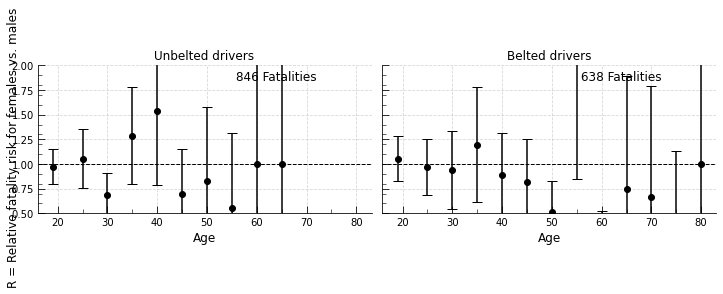

In [12]:
if 'PASSENGER_CAR' in vehicle_types:
    if not driver_only:
        fig = plot_doublepair(vehicle_results['PASSENGER_CAR'])
        fig.savefig(fig_out / "passenger_car_subsets.png")
    else:
        fig = plot_driver_only(vehicle_results['PASSENGER_CAR'])
        fig.savefig(fig_out / "passenger_car_subsets.png")

/Users/mitchell/Documents/000_Biomechanics/Projects/fars-analysis/src/data/fars_utils.py:93: RuntimeWarning: divide by zero encountered in double_scalars
  delta_R_bar = R_bar / np.sqrt(np.sum((working['R']/working['DeltaR'])**2))


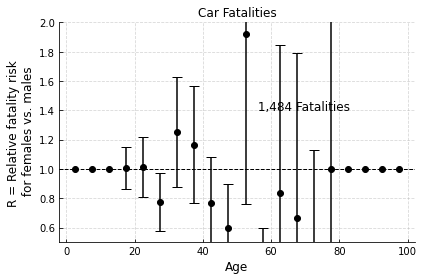

In [13]:
if 'PASSENGER_CAR' in vehicle_types:
    cur_results = vehicle_results['PASSENGER_CAR']
    car_result = combine_results(cur_results['results'])
    car_counts = cur_results['counts']
    fig = plot_single(car_result, car_counts, "Car Fatalities")
    fig.savefig(fig_out / "passenger_cars.png")
    all_results.append(car_result)
    total_count.append(sum(car_counts))

## Results: Light Truck

In [14]:
if 'LIGHT_TRUCK_OR_VAN' in vehicle_types:
    fig = plot_doublepair(vehicle_results['LIGHT_TRUCK_OR_VAN'])
    fig.savefig(fig_out / "truck_subsets.png")

In [15]:
if 'LIGHT_TRUCK_OR_VAN' in vehicle_types:
    cur_results = vehicle_results['LIGHT_TRUCK_OR_VAN']
    truck_result = combine_results(cur_results['results'])
    truck_counts = cur_results['counts']
    fig = plot_single(truck_result, truck_counts, "Light-Truck Fatalities")
    fig.savefig(fig_out / "light_trucks.png")
    all_results.append(truck_result)
    total_count.append(sum(truck_counts))

## Results: Motorcycles

In [16]:
def mcycl_plotter(results, counts, titles):
    fig, axes = plt.subplots(1,2, figsize=(10,3), sharex=True, sharey=True)

    a=[]
    for i, ax in enumerate(axes):
        a.append(ax)

    for i, ax in enumerate(a):
        ax.axhline(1, color='black', lw=1, ls='--')
        results[i].plot(x='Age', y='R', yerr='DeltaR', capsize=5, fmt='ko',
                      ylim = (.5, 2), title=titles[i],
                       ax = ax, legend=False)
        ax.text(55, 1.85, f"{counts[i]: ,} Fatalities", fontsize=12)

        ax.xaxis.set_major_locator(MultipleLocator(10))
        ax.xaxis.set_minor_locator(MultipleLocator(5))
        ax.tick_params(which='major', length=7)
        ax.tick_params(which='minor', length=4)
        #axis.yaxis.set_major_locator(MultipleLocator(10))
        ax.yaxis.set_minor_locator(MultipleLocator(.1))
    plt.ylabel("R = Relative fatality risk for females vs. males")
    plt.show()
    return fig

In [17]:
if 'MOTORCYCLE' in vehicle_types:
    fig = mcycl_plotter(vehicle_results['MOTORCYCLE']['results'],
                        vehicle_results['MOTORCYCLE']['counts'],
                        vehicle_results['MOTORCYCLE']['titles'])
    fig.savefig(fig_out / "motorcycle_subsets.png")

In [18]:
if 'MOTORCYCLE' in vehicle_types:
    mcycl_result = combine_results(vehicle_results['MOTORCYCLE']['results'])
    mcycl_counts = vehicle_results['MOTORCYCLE']['counts']
    fig = plot_single(mcycl_result, mcycl_counts, "Motorcycle Fatalities")
    fig.savefig(fig_out / "motorcycles.png")
    all_results.append(mcycl_result)
    total_count.append(sum(mcycl_counts))

## All Occupants

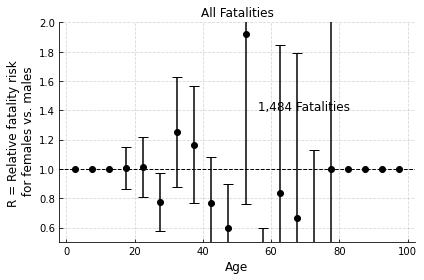

In [19]:
final_result = combine_results(all_results)
fig = plot_single(final_result, total_count, "All Fatalities")
fig.savefig(fig_out / "all_fatalities.png")

## Tables
Tables produced for review, also output as .xlsx (NOT IMPLEMENTED) and .csv files for easy transfer to papers.

In [20]:
if final_runs:
    csv_out = Path(module_path) / "reports" / "final" / "tables" / image_outputs / "csv"
    xlsx_out = Path(module_path) / "reports" / "final" / "tables" / image_outputs / "xlsx"
else:
    csv_out = Path(module_path) / "reports" / "tables" / image_outputs / "csv"
    xlsx_out = Path(module_path) / "reports" / "tables" / image_outputs / "xlsx"

csv_out.mkdir(parents=True, exist_ok=True)
xlsx_out.mkdir(parents=True, exist_ok=True)

In [21]:
for veh_type, cur_veh in vehicle_results.items():
    
    veh_csv = csv_out / veh_type
    veh_xlsx = xlsx_out / veh_type

    veh_csv.mkdir(parents=True, exist_ok=True)
    car_result.to_csv(veh_csv / "full_weighted.csv")

    for title, res, all_res in zip(cur_veh['titles'], 
                                   cur_veh['results'], 
                                   cur_veh['all_res']):
        cur_csv = veh_csv / title
        cur_xlsx = veh_xlsx / title
        cur_csv.mkdir(parents=True, exist_ok=True)
        cur_xlsx.mkdir(parents=True, exist_ok=True)

        #Write out table of weighted results
        res.to_csv(cur_csv / 'weighted_results.csv', float_format='%.3f')
        #res.to_excel(cur_xlsx / 'weighted_results.csv')

        #Write out table of all results
        all_res.to_csv(cur_csv / 'full_results.csv', float_format='%.3f')

        #Loop through each subject interval in all_res, write out this table
        for subj_age in all_res['Subject Age'].unique():
            cur_chunk = all_res.loc[all_res['Subject Age'] == 
                                    subj_age].sort_values('Control Sex', ascending=False)
            cur_chunk.to_csv(cur_csv / f"subjects_{subj_age}.csv", float_format='%.3f')

In [22]:
if 'PASSENGER_CAR' in vehicle_types:
    car_result.to_csv(csv_out / "full_car_weighted.csv")
if 'LIGHT_TRUCK_OR_VAN' in vehicle_types:
    truck_result.to_csv(csv_out / "full_truck_weighted.csv")
if 'MOTORCYCLE' in vehicle_types:
    mcycl_result.to_csv(csv_out / "full_motorcycle_weighted.csv")
final_result.to_csv(csv_out / "full_weighted_result.csv")

In [23]:
summary = []
if 'PASSENGER_CAR' in vehicle_types:
    car = vehicle_results['PASSENGER_CAR']
    car['Female Fatalities'] = [res['A'].sum() for res in car['all_res']]
    car['Male Fatalities'] = [res['C'].sum() for res in car['all_res']]
    summary.append(pd.DataFrame.from_dict(car).drop(columns=
                                                    ['results',
                                                     'all_res',
                                                    ]).assign(Vehicle='Car'))
if 'LIGHT_TRUCK_OR_VAN' in vehicle_types:
    truck = vehicle_results['LIGHT_TRUCK_OR_VAN']
    truck['Female Fatalities'] = [res['A'].sum() for res in truck['all_res']]
    truck['Male Fatalities'] = [res['C'].sum() for res in truck['all_res']]
    summary.append(pd.DataFrame.from_dict(truck).drop(columns=
                                                      ['results',
                                                       'all_res',
                                                       ]).assign(Vehicle='Light truck'))
if 'MOTORCYCLE' in vehicle_types:
    mcycl = vehicle_results['MOTORCYCLE']
    mcycl['Female Fatalities'] = [res['A'].sum() for res in mcycl['all_res']]
    mcycl['Male Fatalities'] = [res['C'].sum() for res in mcycl['all_res']]
    summary.append(pd.DataFrame.from_dict(mcycl).drop(columns=
                                                      ['results',
                                                       'all_res',
                                                       ]).assign(Vehicle='Motorcycle'))
summaries = pd.concat(summary).rename(columns={
    'titles': 'Subject Occupant',
    'counts': 'Total'}).reindex(columns=['Vehicle',
                                         'Subject Occupant',
                                         'Female Fatalities',
                                         'Male Fatalities',
                                         'Total'])
summaries.to_csv(csv_out / "summary.csv")

### Clean up
Due to a bug in the `nbclient` library, as of 3/31/2020, need to clean up large data from memory, or it will persist after the run.

In [24]:
del(data)

In [25]:
%reset -f